In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

__Задача 1__

Даны значения зарплат из выборки выпускников:

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150

Своими руками (т.е. без использования статистических функций вроде mean, std, var) посчитать среднее арифметическое, смещённую и несмещённую оценки дисперсии, среднее квадратичное отклонение для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

In [10]:
a = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150]
n = len(a)
n

21

In [11]:
summa = 0
for i in range(n):
    summa = summa + a[i]
f = summa/n

73.14285714285714

In [22]:
def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)
f = mean([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150])
f

73.14285714285714

In [23]:
f=mean(a)
f

73.14285714285714

Несмещённая оценка дисперсии

In [45]:
summa = 0
for i in range(0,n):
    summa=((a[i]-f)**2)
smesh1 = (summa/n-1)
smesh1

280.28668610301264

In [47]:
smesh12 = np.var(a,ddof = 1)
smesh12

2241.828571428571

почему то не совпало(

Cмещённая оценка дисперсии

In [34]:
summa = 0
for i in range(0,n):
    summa=((a[i]-f)**2)
smesh2 = (summa/n)
smesh2

281.28668610301264

In [48]:
smesh22 = np.var(a,ddof = 0)
smesh22

2135.0748299319725

Cреднее квадратичное отклонение(Несмещённая оценка дисперсии1)

In [50]:
np.sqrt(smesh1)

47.347952135531386

Cреднее квадратичное отклонение(Несмещённая оценка дисперсии2) - а тут совпало

In [52]:
np.sqrt(smesh12)

47.347952135531386

Cреднее квадратичное отклонение(Cмещённая оценка дисперсии1)

In [53]:
np.sqrt(smesh2)

46.206869943028735

Cреднее квадратичное отклонение(Cмещённая оценка дисперсии2)

In [54]:
np.sqrt(smesh22)

46.206869943028735

__Задача 2__

Для выборки из задачи 1 найти (также без использования статистических функций) медиану, первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из boxplot.

В этой задаче неоднозначности в вычислении квантилей можно разрешать любым способом.

Медиану

In [63]:
b=sorted(a)
print(len(b))
b[n//2-5:n//2+5]

21


[45, 55, 57, 65, 65, 70, 75, 75, 77, 80]

In [135]:
median = 70
summa = 0
for i in range(0,n):
    if (a[i]<=median):
        summa = summa+a[i]
n/summa

0.043209876543209874

In [136]:
summa = 0
for i in range(0,n):
    if (a[i]>=median):
        summa = summa+a[i]
n/summa

0.01875

In [59]:
np.median(a)

70.0

Первый и третий квартили

In [70]:
n%4==0

False

In [108]:
b[(n//2-1)//2-3:(n//2-1)//2+6]

[24, 25, 30, 33, 45, 55, 57, 65, 65]

In [109]:
q1 = 45

In [110]:
b[(n*3//2-1)//2-4:(n*3//2-1)//2+5]

[75, 75, 77, 80, 84, 89, 90, 100, 150]

In [111]:
q3=84

Интерквартильное расстояние

In [112]:
np.quantile(b,[0.25,0.75])

array([45., 84.])

(array([16.,  4.,  1.]),
 array([ 17.,  88., 159., 230.]),
 <a list of 3 Patch objects>)

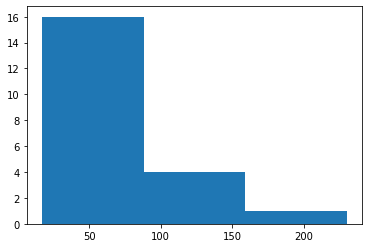

In [113]:
plt.hist(a,bins=3)

(array([3., 2., 1., 2., 2., 4., 2., 2., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 1.]),
 array([ 17.        ,  27.14285714,  37.28571429,  47.42857143,
         57.57142857,  67.71428571,  77.85714286,  88.        ,
         98.14285714, 108.28571429, 118.42857143, 128.57142857,
        138.71428571, 148.85714286, 159.        , 169.14285714,
        179.28571429, 189.42857143, 199.57142857, 209.71428571,
        219.85714286, 230.        ]),
 <a list of 21 Patch objects>)

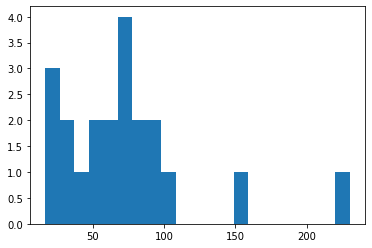

In [114]:
plt.hist(a,bins=21)

{'whiskers': [<matplotlib.lines.Line2D at 0x67ce9c3f28>,
 'caps': [<matplotlib.lines.Line2D at 0x67ce9d0940>,
 'boxes': [<matplotlib.lines.Line2D at 0x67ce9c3dd8>],
 'medians': [<matplotlib.lines.Line2D at 0x67ce9d0fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x67ce9d0f60>],
 'means': []}

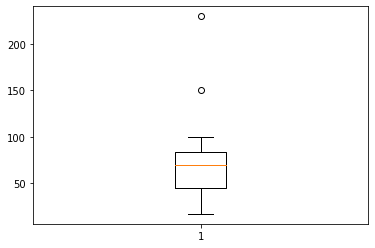

In [115]:
plt.boxplot(a)

In [123]:
iqr = q3-q1
boxplot_range = (q1-1.5*iqr,q3+1.5*iqr)
boxplot_range

(-13.5, 142.5)

In [132]:
c=[]
for i in range(0,n):
    if((a[i] < boxplot_range[0])|(a[i] > boxplot_range[1])):
        list.append(c,a[i])
c

[230, 150]

In [134]:
len(c)/len(a)

0.09523809523809523

__Задача 3__

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

$A=B,
C=A+B$

$P(D)$ - сдас сессию

Вероятность, что студент факультета A сдаст первую сессию => $P(D|A)=0.8$

Вероятность, что студент факультета B сдаст первую сессию => $P(D|B)=0.7$

Вероятность, что студент факультета C сдаст первую сессию => $P(D|C)=0.9$ 

вероятность того, что он учится в $А$ => $P(A)=1/4$

вероятность того, что он учится в $B$ => $P(B)=1/4$

вероятность того, что он учится в $C$ => $P(C)=2/4=1/2$

Найти: a)$P(A|D)$, b)$P(B|D)$, c)$P(C|D)$

\begin{equation}\label{eq:solv}
 a)P(A|D)=\frac{P(A)*P(D|A)}{(P(D|A)*P(A)+P(D|B)*P(B)+P(D|C)*P(C))}
\end{equation}

In [141]:
P_AD=1/4*0.8/(0.8*1/4+0.7*1.4+0.9*1/2)
P_AD

0.1226993865030675

\begin{equation}\label{eq:solv}
 b)P(B|D)=\frac{P(B)*P(D|B)}{(P(D|A)*P(A)+P(D|B)*P(B)+P(D|C)*P(C))}
\end{equation}

In [142]:
P_BD=1/4*0.7/(0.8*1/4+0.7*1.4+0.9*1/2)
P_BD

0.10736196319018405

\begin{equation}\label{eq:solv}
 c)P(C|D)=\frac{P(C)*P(D|C)}{(P(D|A)*P(A)+P(D|B)*P(B)+P(D|C)*P(C))}
\end{equation}

In [143]:
P_CD=1/2*0.9/(0.8*1/4+0.7*1.4+0.9*1/2)
P_CD

0.27607361963190186